In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [2]:
df_initial = pd.read_csv('customers.csv')

In [3]:
df_initial.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [4]:
df_initial.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [5]:
df_initial.shape

(10695, 11)

In [6]:
df_initial.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [7]:
df_cleaned = df_initial.dropna(axis=0)

In [8]:
df_cleaned.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [9]:
df_cleaned['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df_cleaned['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df_cleaned['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df_cleaned['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [13]:
df_cleaned['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [14]:
df_cleaned['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [15]:
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [16]:
categories_lst=[['Male', 'Female'],
            ['No', 'Yes'],
            ['No', 'Yes'],
            ['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor','Homemaker', 'Entertainment', 'Marketing', 'Executive'],
            ['Low', 'High', 'Average']]
enc = OrdinalEncoder(categories=categories_lst)

In [17]:
df1=df_cleaned.copy()

In [18]:
df1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']] =enc.fit_transform(df1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']])

In [19]:
df1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [20]:
le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])

In [21]:
df1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int32
dtype: object

In [22]:
df1.describe()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000,8819.000000
mean,463514.199796,0.448804,0.591450,43.517859,0.634312,3.287561,2.610160,0.643724,2.840118,1.518086
std,2572.440330,0.497400,0.491594,16.581537,0.481650,2.346652,3.390676,0.851172,1.535051,1.146645
min,458982.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,461330.500000,0.000000,0.000000,31.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,463561.000000,0.000000,1.000000,41.000000,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,465735.500000,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,467974.000000,1.000000,1.000000,89.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [23]:
df1['Segmentation'].unique()

array([3, 1, 2, 0])

In [25]:
X = df1[['Gender',
         'Ever_Married',
         'Age',
         'Graduated',
         'Profession',
         'Work_Experience',
         'Spending_Score',
         'Family_Size']].values

y1=df1[['Segmentation']].values
oh_enc = OneHotEncoder()
oh_enc.fit(y1)
y1.shape

(8819, 1)

In [27]:
y=oh_enc.transform(y1).toarray()
y.shape

(8819, 4)

In [28]:
y1[0]

array([3])

In [29]:
y[0]

array([0., 0., 0., 1.])

In [30]:
X.shape

(8819, 8)

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=50)
X_train[0]

array([ 1.,  1., 85.,  0.,  2.,  0.,  0.,  1.])

In [32]:
X_train.shape

(5908, 8)

In [37]:
scaler = MinMaxScaler()
scaler.fit(X_train[:,2].reshape(-1,1))
X_train_scaled = np.copy(X_train)
X_test_scaled = np.copy(X_test)

In [38]:
X_train_scaled[:,2] = scaler.transform(X_train[:,2].reshape(-1,1)).reshape(-1)
X_test_scaled[:,2] = scaler.transform(X_test[:,2].reshape(-1,1)).reshape(-1)

In [40]:
# Creating the model
ai_brain = Sequential([
    Dense(8,input_shape=(8,)),
    Dense(16, activation ='relu'),
    Dense(16),
    Dense(8, activation ='relu'),
    Dense(4,activation='softmax')
])

ai_brain.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [41]:
ai_brain.fit(x=X_train_scaled,y=y_train,
             epochs=2000,batch_size=256,
             validation_data=(X_test_scaled,y_test))

Epoch 1/2000
24/24 [==============================] - 2s 14ms/step - loss: 1.3445 - accuracy: 0.3551 - val_loss: 1.3163 - val_accuracy: 0.3779
Epoch 2/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.2918 - accuracy: 0.4076 - val_loss: 1.2909 - val_accuracy: 0.3964
Epoch 3/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.2727 - accuracy: 0.4118 - val_loss: 1.2788 - val_accuracy: 0.4098
Epoch 4/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.2618 - accuracy: 0.4147 - val_loss: 1.2732 - val_accuracy: 0.4188
Epoch 5/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.2558 - accuracy: 0.4210 - val_loss: 1.2682 - val_accuracy: 0.4284
Epoch 6/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.2517 - accuracy: 0.4326 - val_loss: 1.2632 - val_accuracy: 0.4263
Epoch 7/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.2463 - accuracy: 0.4306 - val_loss: 1.2598 - val_accuracy: 0.4377
Epoch

24/24 [==============================] - 0s 5ms/step - loss: 1.1893 - accuracy: 0.4663 - val_loss: 1.2141 - val_accuracy: 0.4473
Epoch 59/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1882 - accuracy: 0.4677 - val_loss: 1.2148 - val_accuracy: 0.4486
Epoch 60/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1881 - accuracy: 0.4668 - val_loss: 1.2126 - val_accuracy: 0.4504
Epoch 61/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1881 - accuracy: 0.4682 - val_loss: 1.2141 - val_accuracy: 0.4476
Epoch 62/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1881 - accuracy: 0.4675 - val_loss: 1.2128 - val_accuracy: 0.4510
Epoch 63/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1861 - accuracy: 0.4661 - val_loss: 1.2128 - val_accuracy: 0.4483
Epoch 64/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1866 - accuracy: 0.4724 - val_loss: 1.2119 - val_accuracy: 0.4500
Epoch 65/2000

24/24 [==============================] - 0s 5ms/step - loss: 1.1754 - accuracy: 0.4812 - val_loss: 1.2081 - val_accuracy: 0.4579
Epoch 116/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1744 - accuracy: 0.4853 - val_loss: 1.2110 - val_accuracy: 0.4596
Epoch 117/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1740 - accuracy: 0.4834 - val_loss: 1.2075 - val_accuracy: 0.4583
Epoch 118/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1756 - accuracy: 0.4817 - val_loss: 1.2070 - val_accuracy: 0.4614
Epoch 119/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1737 - accuracy: 0.4861 - val_loss: 1.2055 - val_accuracy: 0.4589
Epoch 120/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1761 - accuracy: 0.4866 - val_loss: 1.2061 - val_accuracy: 0.4614
Epoch 121/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1732 - accuracy: 0.4893 - val_loss: 1.2055 - val_accuracy: 0.4593
Epoch 1

Epoch 172/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1664 - accuracy: 0.4951 - val_loss: 1.2070 - val_accuracy: 0.4593
Epoch 173/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1683 - accuracy: 0.4927 - val_loss: 1.2042 - val_accuracy: 0.4638
Epoch 174/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1686 - accuracy: 0.4944 - val_loss: 1.2033 - val_accuracy: 0.4583
Epoch 175/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1669 - accuracy: 0.4909 - val_loss: 1.2040 - val_accuracy: 0.4614
Epoch 176/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1665 - accuracy: 0.4956 - val_loss: 1.2033 - val_accuracy: 0.4610
Epoch 177/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1658 - accuracy: 0.4937 - val_loss: 1.2045 - val_accuracy: 0.4624
Epoch 178/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1661 - accuracy: 0.4971 - val_loss: 1.2037 - val_accuracy:

Epoch 229/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.1623 - accuracy: 0.4954 - val_loss: 1.2035 - val_accuracy: 0.4583
Epoch 230/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.1627 - accuracy: 0.4897 - val_loss: 1.2035 - val_accuracy: 0.4600
Epoch 231/2000
24/24 [==============================] - 0s 3ms/step - loss: 1.1612 - accuracy: 0.4963 - val_loss: 1.2029 - val_accuracy: 0.4610
Epoch 232/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1640 - accuracy: 0.4917 - val_loss: 1.2020 - val_accuracy: 0.4641
Epoch 233/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1607 - accuracy: 0.4971 - val_loss: 1.2009 - val_accuracy: 0.4607
Epoch 234/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1609 - accuracy: 0.4954 - val_loss: 1.2025 - val_accuracy: 0.4620
Epoch 235/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1607 - accuracy: 0.4959 - val_loss: 1.2017 - val_accuracy:

Epoch 286/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1580 - accuracy: 0.4949 - val_loss: 1.2007 - val_accuracy: 0.4593
Epoch 287/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1598 - accuracy: 0.4932 - val_loss: 1.1988 - val_accuracy: 0.4627
Epoch 288/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1618 - accuracy: 0.4937 - val_loss: 1.2007 - val_accuracy: 0.4610
Epoch 289/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1568 - accuracy: 0.4961 - val_loss: 1.2011 - val_accuracy: 0.4624
Epoch 290/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1563 - accuracy: 0.4968 - val_loss: 1.1999 - val_accuracy: 0.4589
Epoch 291/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1566 - accuracy: 0.4981 - val_loss: 1.1988 - val_accuracy: 0.4668
Epoch 292/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1579 - accuracy: 0.4944 - val_loss: 1.2019 - val_accuracy:

Epoch 343/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1541 - accuracy: 0.5010 - val_loss: 1.2020 - val_accuracy: 0.4686
Epoch 344/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1559 - accuracy: 0.4934 - val_loss: 1.2015 - val_accuracy: 0.4648
Epoch 345/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1548 - accuracy: 0.4988 - val_loss: 1.2019 - val_accuracy: 0.4651
Epoch 346/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1554 - accuracy: 0.4971 - val_loss: 1.2023 - val_accuracy: 0.4607
Epoch 347/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1545 - accuracy: 0.4981 - val_loss: 1.2052 - val_accuracy: 0.4624
Epoch 348/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1556 - accuracy: 0.4978 - val_loss: 1.2013 - val_accuracy: 0.4624
Epoch 349/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1558 - accuracy: 0.4992 - val_loss: 1.2008 - val_accuracy:

Epoch 400/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1524 - accuracy: 0.4978 - val_loss: 1.2078 - val_accuracy: 0.4617
Epoch 401/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1559 - accuracy: 0.4992 - val_loss: 1.2005 - val_accuracy: 0.4617
Epoch 402/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1556 - accuracy: 0.4951 - val_loss: 1.2015 - val_accuracy: 0.4607
Epoch 403/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1593 - accuracy: 0.4909 - val_loss: 1.1997 - val_accuracy: 0.4662
Epoch 404/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1529 - accuracy: 0.5020 - val_loss: 1.1998 - val_accuracy: 0.4627
Epoch 405/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1529 - accuracy: 0.4958 - val_loss: 1.2003 - val_accuracy: 0.4603
Epoch 406/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1538 - accuracy: 0.5007 - val_loss: 1.2035 - val_accuracy:

Epoch 457/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1510 - accuracy: 0.4988 - val_loss: 1.2006 - val_accuracy: 0.4579
Epoch 458/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1530 - accuracy: 0.4944 - val_loss: 1.2004 - val_accuracy: 0.4631
Epoch 459/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1513 - accuracy: 0.5015 - val_loss: 1.2012 - val_accuracy: 0.4644
Epoch 460/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1506 - accuracy: 0.5010 - val_loss: 1.2021 - val_accuracy: 0.4672
Epoch 461/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1522 - accuracy: 0.5036 - val_loss: 1.2009 - val_accuracy: 0.4596
Epoch 462/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1494 - accuracy: 0.5008 - val_loss: 1.2008 - val_accuracy: 0.4576
Epoch 463/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1505 - accuracy: 0.5000 - val_loss: 1.2023 - val_accuracy:

Epoch 514/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1518 - accuracy: 0.5012 - val_loss: 1.2013 - val_accuracy: 0.4648
Epoch 515/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1494 - accuracy: 0.5000 - val_loss: 1.2021 - val_accuracy: 0.4631
Epoch 516/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1504 - accuracy: 0.5029 - val_loss: 1.2005 - val_accuracy: 0.4596
Epoch 517/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1486 - accuracy: 0.5003 - val_loss: 1.1994 - val_accuracy: 0.4627
Epoch 518/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1485 - accuracy: 0.5012 - val_loss: 1.2018 - val_accuracy: 0.4562
Epoch 519/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1497 - accuracy: 0.5036 - val_loss: 1.1997 - val_accuracy: 0.4620
Epoch 520/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1487 - accuracy: 0.5046 - val_loss: 1.1987 - val_accuracy:

Epoch 571/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1490 - accuracy: 0.4990 - val_loss: 1.2021 - val_accuracy: 0.4593
Epoch 572/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1473 - accuracy: 0.5014 - val_loss: 1.2042 - val_accuracy: 0.4607
Epoch 573/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1474 - accuracy: 0.5039 - val_loss: 1.1990 - val_accuracy: 0.4627
Epoch 574/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1494 - accuracy: 0.4964 - val_loss: 1.2036 - val_accuracy: 0.4651
Epoch 575/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1467 - accuracy: 0.4995 - val_loss: 1.1997 - val_accuracy: 0.4576
Epoch 576/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1462 - accuracy: 0.4988 - val_loss: 1.2012 - val_accuracy: 0.4641
Epoch 577/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1475 - accuracy: 0.4998 - val_loss: 1.1990 - val_accuracy:

Epoch 628/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.1480 - accuracy: 0.4975 - val_loss: 1.2019 - val_accuracy: 0.4562
Epoch 629/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.1457 - accuracy: 0.4986 - val_loss: 1.2014 - val_accuracy: 0.4624
Epoch 630/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1460 - accuracy: 0.4976 - val_loss: 1.2009 - val_accuracy: 0.4562
Epoch 631/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1480 - accuracy: 0.4961 - val_loss: 1.2018 - val_accuracy: 0.4569
Epoch 632/2000
24/24 [==============================] - 0s 9ms/step - loss: 1.1509 - accuracy: 0.4959 - val_loss: 1.1987 - val_accuracy: 0.4586
Epoch 633/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1450 - accuracy: 0.4983 - val_loss: 1.1990 - val_accuracy: 0.4614
Epoch 634/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.1449 - accuracy: 0.5012 - val_loss: 1.2014 - val_accuracy:

Epoch 685/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1491 - accuracy: 0.4970 - val_loss: 1.2013 - val_accuracy: 0.4596
Epoch 686/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1455 - accuracy: 0.4954 - val_loss: 1.1994 - val_accuracy: 0.4552
Epoch 687/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1448 - accuracy: 0.4970 - val_loss: 1.1990 - val_accuracy: 0.4559
Epoch 688/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1460 - accuracy: 0.4997 - val_loss: 1.1983 - val_accuracy: 0.4541
Epoch 689/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1470 - accuracy: 0.4971 - val_loss: 1.1998 - val_accuracy: 0.4562
Epoch 690/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1498 - accuracy: 0.4961 - val_loss: 1.1996 - val_accuracy: 0.4624
Epoch 691/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1459 - accuracy: 0.5024 - val_loss: 1.2031 - val_accuracy:

Epoch 742/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1439 - accuracy: 0.5002 - val_loss: 1.2033 - val_accuracy: 0.4593
Epoch 743/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1447 - accuracy: 0.5022 - val_loss: 1.2016 - val_accuracy: 0.4600
Epoch 744/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1426 - accuracy: 0.4990 - val_loss: 1.2000 - val_accuracy: 0.4524
Epoch 745/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1446 - accuracy: 0.5027 - val_loss: 1.2022 - val_accuracy: 0.4583
Epoch 746/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1452 - accuracy: 0.4971 - val_loss: 1.2005 - val_accuracy: 0.4559
Epoch 747/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1425 - accuracy: 0.5000 - val_loss: 1.2001 - val_accuracy: 0.4583
Epoch 748/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1445 - accuracy: 0.4997 - val_loss: 1.2010 - val_accuracy:

Epoch 799/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1469 - accuracy: 0.5019 - val_loss: 1.2005 - val_accuracy: 0.4514
Epoch 800/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1439 - accuracy: 0.4993 - val_loss: 1.2036 - val_accuracy: 0.4600
Epoch 801/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1468 - accuracy: 0.4958 - val_loss: 1.2024 - val_accuracy: 0.4617
Epoch 802/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1433 - accuracy: 0.4993 - val_loss: 1.2030 - val_accuracy: 0.4565
Epoch 803/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1432 - accuracy: 0.5029 - val_loss: 1.2018 - val_accuracy: 0.4614
Epoch 804/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1437 - accuracy: 0.5003 - val_loss: 1.2020 - val_accuracy: 0.4552
Epoch 805/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1430 - accuracy: 0.4990 - val_loss: 1.2003 - val_accuracy:

Epoch 856/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1410 - accuracy: 0.4990 - val_loss: 1.2011 - val_accuracy: 0.4603
Epoch 857/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.1418 - accuracy: 0.5027 - val_loss: 1.2021 - val_accuracy: 0.4586
Epoch 858/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1419 - accuracy: 0.5008 - val_loss: 1.2006 - val_accuracy: 0.4555
Epoch 859/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1413 - accuracy: 0.5030 - val_loss: 1.2049 - val_accuracy: 0.4627
Epoch 860/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1441 - accuracy: 0.5005 - val_loss: 1.2066 - val_accuracy: 0.4589
Epoch 861/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1447 - accuracy: 0.5008 - val_loss: 1.2026 - val_accuracy: 0.4583
Epoch 862/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1418 - accuracy: 0.5039 - val_loss: 1.2011 - val_accuracy:

Epoch 913/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1403 - accuracy: 0.5024 - val_loss: 1.2026 - val_accuracy: 0.4565
Epoch 914/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1403 - accuracy: 0.5058 - val_loss: 1.1987 - val_accuracy: 0.4593
Epoch 915/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1395 - accuracy: 0.5005 - val_loss: 1.1998 - val_accuracy: 0.4596
Epoch 916/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1408 - accuracy: 0.5049 - val_loss: 1.2004 - val_accuracy: 0.4627
Epoch 917/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1410 - accuracy: 0.5027 - val_loss: 1.2014 - val_accuracy: 0.4583
Epoch 918/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1408 - accuracy: 0.5034 - val_loss: 1.2029 - val_accuracy: 0.4572
Epoch 919/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1401 - accuracy: 0.5037 - val_loss: 1.2005 - val_accuracy:

Epoch 970/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1376 - accuracy: 0.5036 - val_loss: 1.2028 - val_accuracy: 0.4565
Epoch 971/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1386 - accuracy: 0.5024 - val_loss: 1.2013 - val_accuracy: 0.4579
Epoch 972/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1381 - accuracy: 0.5041 - val_loss: 1.2035 - val_accuracy: 0.4586
Epoch 973/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1371 - accuracy: 0.5029 - val_loss: 1.2044 - val_accuracy: 0.4583
Epoch 974/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1413 - accuracy: 0.5027 - val_loss: 1.2060 - val_accuracy: 0.4607
Epoch 975/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1385 - accuracy: 0.5049 - val_loss: 1.2037 - val_accuracy: 0.4579
Epoch 976/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1396 - accuracy: 0.5066 - val_loss: 1.2038 - val_accuracy:

Epoch 1027/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1389 - accuracy: 0.5034 - val_loss: 1.2040 - val_accuracy: 0.4562
Epoch 1028/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1364 - accuracy: 0.5078 - val_loss: 1.2030 - val_accuracy: 0.4559
Epoch 1029/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1374 - accuracy: 0.5068 - val_loss: 1.2031 - val_accuracy: 0.4528
Epoch 1030/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1375 - accuracy: 0.5058 - val_loss: 1.2022 - val_accuracy: 0.4617
Epoch 1031/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1374 - accuracy: 0.5047 - val_loss: 1.2045 - val_accuracy: 0.4562
Epoch 1032/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1405 - accuracy: 0.5049 - val_loss: 1.2047 - val_accuracy: 0.4596
Epoch 1033/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1375 - accuracy: 0.5056 - val_loss: 1.2035 - val_ac

24/24 [==============================] - 0s 5ms/step - loss: 1.1365 - accuracy: 0.5066 - val_loss: 1.2042 - val_accuracy: 0.4524
Epoch 1084/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1358 - accuracy: 0.5042 - val_loss: 1.2037 - val_accuracy: 0.4559
Epoch 1085/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1344 - accuracy: 0.5085 - val_loss: 1.2048 - val_accuracy: 0.4521
Epoch 1086/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1353 - accuracy: 0.5042 - val_loss: 1.2065 - val_accuracy: 0.4548
Epoch 1087/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1351 - accuracy: 0.5071 - val_loss: 1.2065 - val_accuracy: 0.4548
Epoch 1088/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1368 - accuracy: 0.5047 - val_loss: 1.2027 - val_accuracy: 0.4586
Epoch 1089/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1372 - accuracy: 0.5049 - val_loss: 1.2024 - val_accuracy: 0.4572
E

24/24 [==============================] - 0s 5ms/step - loss: 1.1368 - accuracy: 0.5039 - val_loss: 1.2035 - val_accuracy: 0.4552
Epoch 1140/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1354 - accuracy: 0.5086 - val_loss: 1.2049 - val_accuracy: 0.4572
Epoch 1141/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1364 - accuracy: 0.5049 - val_loss: 1.2050 - val_accuracy: 0.4538
Epoch 1142/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1348 - accuracy: 0.5042 - val_loss: 1.2033 - val_accuracy: 0.4559
Epoch 1143/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1361 - accuracy: 0.5032 - val_loss: 1.2053 - val_accuracy: 0.4524
Epoch 1144/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1352 - accuracy: 0.5080 - val_loss: 1.2044 - val_accuracy: 0.4545
Epoch 1145/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1367 - accuracy: 0.5068 - val_loss: 1.2040 - val_accuracy: 0.4545
E

24/24 [==============================] - 0s 7ms/step - loss: 1.1365 - accuracy: 0.5047 - val_loss: 1.2073 - val_accuracy: 0.4541
Epoch 1196/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1335 - accuracy: 0.5091 - val_loss: 1.2052 - val_accuracy: 0.4559
Epoch 1197/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1366 - accuracy: 0.5063 - val_loss: 1.2096 - val_accuracy: 0.4507
Epoch 1198/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1336 - accuracy: 0.5066 - val_loss: 1.2081 - val_accuracy: 0.4521
Epoch 1199/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1351 - accuracy: 0.5041 - val_loss: 1.2125 - val_accuracy: 0.4528
Epoch 1200/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1377 - accuracy: 0.5027 - val_loss: 1.2097 - val_accuracy: 0.4572
Epoch 1201/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1349 - accuracy: 0.5042 - val_loss: 1.2079 - val_accuracy: 0.4528
E

24/24 [==============================] - 0s 5ms/step - loss: 1.1374 - accuracy: 0.5036 - val_loss: 1.2092 - val_accuracy: 0.4528
Epoch 1252/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1358 - accuracy: 0.5036 - val_loss: 1.2047 - val_accuracy: 0.4559
Epoch 1253/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1376 - accuracy: 0.5037 - val_loss: 1.2047 - val_accuracy: 0.4548
Epoch 1254/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1331 - accuracy: 0.5051 - val_loss: 1.2063 - val_accuracy: 0.4552
Epoch 1255/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1335 - accuracy: 0.5069 - val_loss: 1.2063 - val_accuracy: 0.4517
Epoch 1256/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1344 - accuracy: 0.5074 - val_loss: 1.2066 - val_accuracy: 0.4579
Epoch 1257/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1341 - accuracy: 0.5039 - val_loss: 1.2058 - val_accuracy: 0.4538
E

24/24 [==============================] - 0s 7ms/step - loss: 1.1327 - accuracy: 0.5068 - val_loss: 1.2069 - val_accuracy: 0.4510
Epoch 1308/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1344 - accuracy: 0.5051 - val_loss: 1.2078 - val_accuracy: 0.4531
Epoch 1309/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1380 - accuracy: 0.5030 - val_loss: 1.2058 - val_accuracy: 0.4497
Epoch 1310/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1333 - accuracy: 0.5063 - val_loss: 1.2072 - val_accuracy: 0.4552
Epoch 1311/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1371 - accuracy: 0.5041 - val_loss: 1.2060 - val_accuracy: 0.4541
Epoch 1312/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1343 - accuracy: 0.5058 - val_loss: 1.2056 - val_accuracy: 0.4517
Epoch 1313/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1338 - accuracy: 0.5054 - val_loss: 1.2082 - val_accuracy: 0.4555
E

24/24 [==============================] - 0s 6ms/step - loss: 1.1336 - accuracy: 0.5041 - val_loss: 1.2076 - val_accuracy: 0.4535
Epoch 1364/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1330 - accuracy: 0.5041 - val_loss: 1.2067 - val_accuracy: 0.4545
Epoch 1365/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1322 - accuracy: 0.5071 - val_loss: 1.2083 - val_accuracy: 0.4500
Epoch 1366/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1319 - accuracy: 0.5069 - val_loss: 1.2063 - val_accuracy: 0.4541
Epoch 1367/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1319 - accuracy: 0.5069 - val_loss: 1.2075 - val_accuracy: 0.4535
Epoch 1368/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1356 - accuracy: 0.5022 - val_loss: 1.2100 - val_accuracy: 0.4535
Epoch 1369/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1336 - accuracy: 0.5056 - val_loss: 1.2081 - val_accuracy: 0.4535
E

24/24 [==============================] - 0s 5ms/step - loss: 1.1325 - accuracy: 0.5052 - val_loss: 1.2104 - val_accuracy: 0.4559
Epoch 1420/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1360 - accuracy: 0.5044 - val_loss: 1.2057 - val_accuracy: 0.4552
Epoch 1421/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1337 - accuracy: 0.5056 - val_loss: 1.2078 - val_accuracy: 0.4524
Epoch 1422/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1340 - accuracy: 0.5090 - val_loss: 1.2074 - val_accuracy: 0.4541
Epoch 1423/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1319 - accuracy: 0.5064 - val_loss: 1.2080 - val_accuracy: 0.4548
Epoch 1424/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1326 - accuracy: 0.5046 - val_loss: 1.2082 - val_accuracy: 0.4562
Epoch 1425/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1336 - accuracy: 0.5017 - val_loss: 1.2082 - val_accuracy: 0.4500
E

24/24 [==============================] - 0s 5ms/step - loss: 1.1313 - accuracy: 0.5074 - val_loss: 1.2077 - val_accuracy: 0.4538
Epoch 1476/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1316 - accuracy: 0.5074 - val_loss: 1.2090 - val_accuracy: 0.4531
Epoch 1477/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1334 - accuracy: 0.5029 - val_loss: 1.2097 - val_accuracy: 0.4493
Epoch 1478/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1319 - accuracy: 0.5059 - val_loss: 1.2082 - val_accuracy: 0.4548
Epoch 1479/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1318 - accuracy: 0.5051 - val_loss: 1.2120 - val_accuracy: 0.4569
Epoch 1480/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1325 - accuracy: 0.5074 - val_loss: 1.2091 - val_accuracy: 0.4528
Epoch 1481/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1342 - accuracy: 0.5059 - val_loss: 1.2078 - val_accuracy: 0.4548
E

24/24 [==============================] - 0s 5ms/step - loss: 1.1307 - accuracy: 0.5049 - val_loss: 1.2103 - val_accuracy: 0.4562
Epoch 1532/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1318 - accuracy: 0.5052 - val_loss: 1.2087 - val_accuracy: 0.4572
Epoch 1533/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1317 - accuracy: 0.5078 - val_loss: 1.2078 - val_accuracy: 0.4572
Epoch 1534/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1304 - accuracy: 0.5083 - val_loss: 1.2093 - val_accuracy: 0.4531
Epoch 1535/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1311 - accuracy: 0.5093 - val_loss: 1.2098 - val_accuracy: 0.4545
Epoch 1536/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1312 - accuracy: 0.5061 - val_loss: 1.2096 - val_accuracy: 0.4562
Epoch 1537/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1306 - accuracy: 0.5064 - val_loss: 1.2084 - val_accuracy: 0.4538
E

24/24 [==============================] - 0s 6ms/step - loss: 1.1306 - accuracy: 0.5071 - val_loss: 1.2105 - val_accuracy: 0.4565
Epoch 1588/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1304 - accuracy: 0.5069 - val_loss: 1.2096 - val_accuracy: 0.4555
Epoch 1589/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1337 - accuracy: 0.5051 - val_loss: 1.2095 - val_accuracy: 0.4579
Epoch 1590/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1311 - accuracy: 0.5066 - val_loss: 1.2081 - val_accuracy: 0.4538
Epoch 1591/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1327 - accuracy: 0.5098 - val_loss: 1.2079 - val_accuracy: 0.4555
Epoch 1592/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1308 - accuracy: 0.5066 - val_loss: 1.2091 - val_accuracy: 0.4559
Epoch 1593/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1309 - accuracy: 0.5088 - val_loss: 1.2125 - val_accuracy: 0.4593
E

24/24 [==============================] - 0s 5ms/step - loss: 1.1318 - accuracy: 0.5066 - val_loss: 1.2098 - val_accuracy: 0.4548
Epoch 1644/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1311 - accuracy: 0.5069 - val_loss: 1.2083 - val_accuracy: 0.4548
Epoch 1645/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1301 - accuracy: 0.5052 - val_loss: 1.2079 - val_accuracy: 0.4531
Epoch 1646/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1311 - accuracy: 0.5105 - val_loss: 1.2089 - val_accuracy: 0.4559
Epoch 1647/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1297 - accuracy: 0.5093 - val_loss: 1.2091 - val_accuracy: 0.4517
Epoch 1648/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1319 - accuracy: 0.5056 - val_loss: 1.2093 - val_accuracy: 0.4517
Epoch 1649/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1303 - accuracy: 0.5049 - val_loss: 1.2104 - val_accuracy: 0.4565
E

24/24 [==============================] - 0s 5ms/step - loss: 1.1308 - accuracy: 0.5120 - val_loss: 1.2113 - val_accuracy: 0.4548
Epoch 1700/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1318 - accuracy: 0.5049 - val_loss: 1.2099 - val_accuracy: 0.4524
Epoch 1701/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1310 - accuracy: 0.5080 - val_loss: 1.2103 - val_accuracy: 0.4507
Epoch 1702/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1313 - accuracy: 0.5098 - val_loss: 1.2118 - val_accuracy: 0.4552
Epoch 1703/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1307 - accuracy: 0.5081 - val_loss: 1.2089 - val_accuracy: 0.4538
Epoch 1704/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1319 - accuracy: 0.5098 - val_loss: 1.2106 - val_accuracy: 0.4514
Epoch 1705/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1322 - accuracy: 0.5047 - val_loss: 1.2080 - val_accuracy: 0.4500
E

24/24 [==============================] - 0s 9ms/step - loss: 1.1322 - accuracy: 0.5078 - val_loss: 1.2122 - val_accuracy: 0.4473
Epoch 1756/2000
24/24 [==============================] - 0s 9ms/step - loss: 1.1320 - accuracy: 0.5071 - val_loss: 1.2099 - val_accuracy: 0.4531
Epoch 1757/2000
24/24 [==============================] - 0s 9ms/step - loss: 1.1308 - accuracy: 0.5080 - val_loss: 1.2084 - val_accuracy: 0.4524
Epoch 1758/2000
24/24 [==============================] - 0s 10ms/step - loss: 1.1292 - accuracy: 0.5091 - val_loss: 1.2116 - val_accuracy: 0.4552
Epoch 1759/2000
24/24 [==============================] - 0s 9ms/step - loss: 1.1295 - accuracy: 0.5049 - val_loss: 1.2095 - val_accuracy: 0.4545
Epoch 1760/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.1301 - accuracy: 0.5074 - val_loss: 1.2118 - val_accuracy: 0.4517
Epoch 1761/2000
24/24 [==============================] - 0s 8ms/step - loss: 1.1304 - accuracy: 0.5042 - val_loss: 1.2088 - val_accuracy: 0.4500


24/24 [==============================] - 0s 6ms/step - loss: 1.1288 - accuracy: 0.5095 - val_loss: 1.2093 - val_accuracy: 0.4528
Epoch 1812/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1290 - accuracy: 0.5088 - val_loss: 1.2097 - val_accuracy: 0.4517
Epoch 1813/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1295 - accuracy: 0.5086 - val_loss: 1.2097 - val_accuracy: 0.4521
Epoch 1814/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1298 - accuracy: 0.5074 - val_loss: 1.2095 - val_accuracy: 0.4541
Epoch 1815/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1291 - accuracy: 0.5059 - val_loss: 1.2102 - val_accuracy: 0.4531
Epoch 1816/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1305 - accuracy: 0.5068 - val_loss: 1.2092 - val_accuracy: 0.4466
Epoch 1817/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1295 - accuracy: 0.5083 - val_loss: 1.2096 - val_accuracy: 0.4528
E

24/24 [==============================] - 0s 6ms/step - loss: 1.1316 - accuracy: 0.5052 - val_loss: 1.2135 - val_accuracy: 0.4497
Epoch 1868/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1307 - accuracy: 0.5085 - val_loss: 1.2080 - val_accuracy: 0.4473
Epoch 1869/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1285 - accuracy: 0.5142 - val_loss: 1.2094 - val_accuracy: 0.4510
Epoch 1870/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1298 - accuracy: 0.5069 - val_loss: 1.2108 - val_accuracy: 0.4531
Epoch 1871/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1287 - accuracy: 0.5095 - val_loss: 1.2100 - val_accuracy: 0.4504
Epoch 1872/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1306 - accuracy: 0.5098 - val_loss: 1.2093 - val_accuracy: 0.4510
Epoch 1873/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1301 - accuracy: 0.5124 - val_loss: 1.2098 - val_accuracy: 0.4497
E

24/24 [==============================] - 0s 6ms/step - loss: 1.1284 - accuracy: 0.5103 - val_loss: 1.2098 - val_accuracy: 0.4504
Epoch 1924/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1288 - accuracy: 0.5088 - val_loss: 1.2099 - val_accuracy: 0.4524
Epoch 1925/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1288 - accuracy: 0.5096 - val_loss: 1.2100 - val_accuracy: 0.4504
Epoch 1926/2000
24/24 [==============================] - 0s 7ms/step - loss: 1.1288 - accuracy: 0.5112 - val_loss: 1.2104 - val_accuracy: 0.4524
Epoch 1927/2000
24/24 [==============================] - 0s 5ms/step - loss: 1.1298 - accuracy: 0.5122 - val_loss: 1.2092 - val_accuracy: 0.4504
Epoch 1928/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1295 - accuracy: 0.5096 - val_loss: 1.2113 - val_accuracy: 0.4517
Epoch 1929/2000
24/24 [==============================] - 0s 4ms/step - loss: 1.1289 - accuracy: 0.5098 - val_loss: 1.2095 - val_accuracy: 0.4504
E

24/24 [==============================] - 0s 6ms/step - loss: 1.1293 - accuracy: 0.5098 - val_loss: 1.2086 - val_accuracy: 0.4462
Epoch 1980/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1278 - accuracy: 0.5112 - val_loss: 1.2118 - val_accuracy: 0.4535
Epoch 1981/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1287 - accuracy: 0.5095 - val_loss: 1.2091 - val_accuracy: 0.4514
Epoch 1982/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1281 - accuracy: 0.5125 - val_loss: 1.2095 - val_accuracy: 0.4483
Epoch 1983/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1295 - accuracy: 0.5091 - val_loss: 1.2174 - val_accuracy: 0.4524
Epoch 1984/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1348 - accuracy: 0.5030 - val_loss: 1.2088 - val_accuracy: 0.4493
Epoch 1985/2000
24/24 [==============================] - 0s 6ms/step - loss: 1.1294 - accuracy: 0.5091 - val_loss: 1.2090 - val_accuracy: 0.4411
E

In [42]:
metrics = pd.DataFrame(ai_brain.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.344510,0.355112,1.316276,0.377877
1,1.291795,0.407583,1.290916,0.396427
2,1.272707,0.411814,1.278848,0.409825
3,1.261813,0.414692,1.273228,0.418756
4,1.255799,0.420955,1.268172,0.428375


<AxesSubplot:>

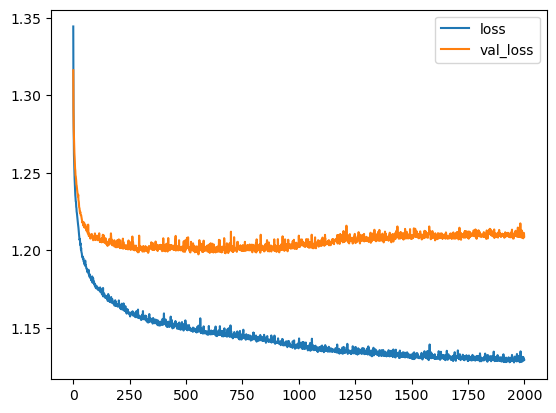

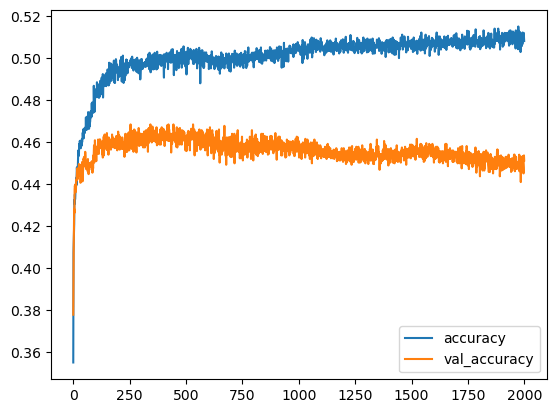

In [43]:
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [44]:
x_test_predictions = np.argmax(ai_brain.predict(X_test_scaled), axis=1)
x_test_predictions.shape

91/91 [==============================] - 0s 1ms/step


(2911,)

In [45]:
y_test_truevalue = np.argmax(y_test,axis=1)
y_test_truevalue.shapeAC

(2911,)

In [47]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[307 149 122 179]
 [190 158 236 102]
 [102 126 372  86]
 [185  58  62 477]]


In [48]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.39      0.41      0.40       757
           1       0.32      0.23      0.27       686
           2       0.47      0.54      0.50       686
           3       0.57      0.61      0.59       782

    accuracy                           0.45      2911
   macro avg       0.44      0.45      0.44      2911
weighted avg       0.44      0.45      0.44      2911



In [49]:
x_single_prediction = np.argmax(ai_brain.predict(X_test_scaled[1:2,:]), axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 30ms/step
[2]


In [50]:
print(le.inverse_transform(x_single_prediction))

['C']
